In [5]:
!gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!gdown https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg
!gdown https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
To: /content/yolov4.weights
100% 258M/258M [00:01<00:00, 164MB/s]
Downloading...
From: https://raw.githubusercontent.com/Tianxiaomo/pytorch-YOLOv4/master/cfg/yolov4.cfg
To: /content/yolov4.cfg
12.2kB [00:00, 37.8MB/s]     
Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: /content/coco.names
625B [00:00, 2.65MB/s]       


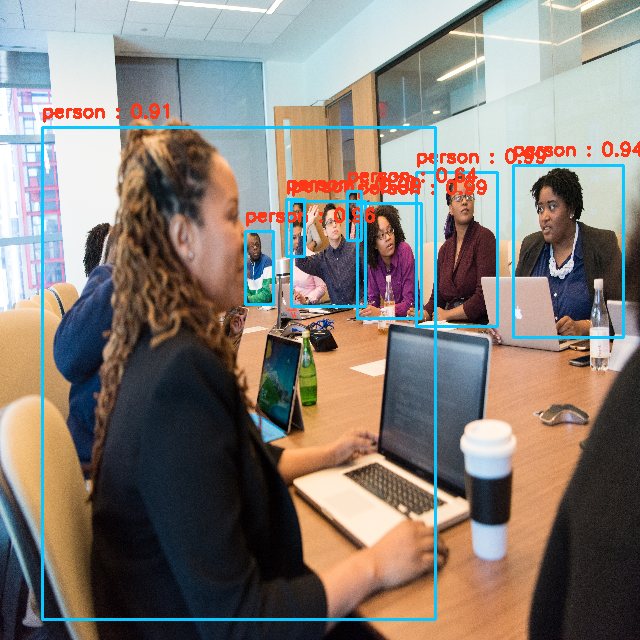

In [6]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

# Replace this with the correct path to your image
image_path = "/content/nonsync.jpg"
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Resize the image to match the expected input size of the YOLO model
    input_size = (640, 640)
    resized_img = cv2.resize(img, input_size)

    arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
    arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
    model = cv2.dnn_DetectionModel(arc)
    model.setInputParams(size=input_size, scale=1/255, swapRB=True)

    x = time.time()
    classes, scores, boxes = model.detect(resized_img, confidence, Nms)

    for (classid, score, box) in zip(classes, scores, boxes):
        class_name = class_names[classid]
        if class_name == "person":
            label = "%s : %.2f" % (class_name, score)
            cv2.rectangle(resized_img, box, color=(255, 200, 10), thickness=2)
            cv2.putText(resized_img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

    cv2_imshow(resized_img)